In [ ]:
# https://qiita.com/yhyhyhjp/items/ebda34f46369b7d3ac8e

In [3]:
from sklearn import svm
from sklearn import metrics

<Figure size 432x288 with 0 Axes>

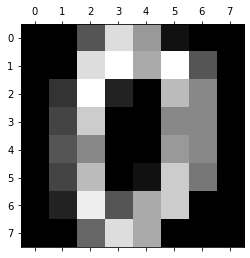

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [37]:
print(digits.data)
digits.data.shape

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


(1797, 64)

In [42]:
print(type(digits.images))
digits.images.shape

<class 'numpy.ndarray'>


(1797, 8, 8)

In [40]:
tr = digits.data
tr = tr.reshape(1797, 8, 8)
type(tr)

numpy.ndarray

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

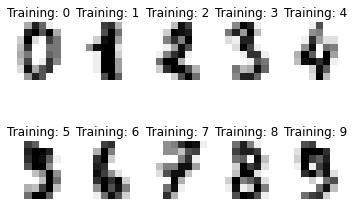

In [10]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('Training: %i' % label)
plt.show()

In [14]:
x = digits.data
y = digits.target
print(x.shape, y.shape)

(1797, 64) (1797,)


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [44]:
x_test.shape

(540, 64)

In [17]:
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(x_train, y_train)

1.0

In [18]:
print(y_test[0])
clf.predict(x_test[:1])

2


array([2])

In [19]:
clf.score(x_test, y_test)

0.9740740740740741

In [21]:
predicted = clf.predict(x_test) 
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))
# 適合率(precision)、再現率(recall)、F値(f1-score)、個数(support)

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.93      0.98      0.95        52
           2       0.98      1.00      0.99        53
           3       0.96      0.98      0.97        54
           4       0.96      1.00      0.98        48
           5       0.98      0.98      0.98        57
           6       1.00      0.98      0.99        60
           7       1.00      0.96      0.98        53
           8       0.96      0.90      0.93        61
           9       0.96      0.96      0.96        57

    accuracy                           0.97       540
   macro avg       0.97      0.98      0.97       540
weigh

In [46]:
y_test[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

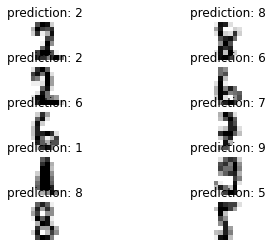

In [45]:
images_and_labels = list(zip(x_test.reshape(540, 8, 8), predicted))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(5, 2, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('prediction: %i' % label)
plt.show()